# Section 1: Showing waveform and spectrograms of a sample recording

references: 

https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

Log transformation - https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram


In [4]:
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display
import numpy as np

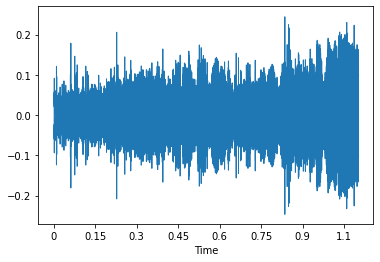

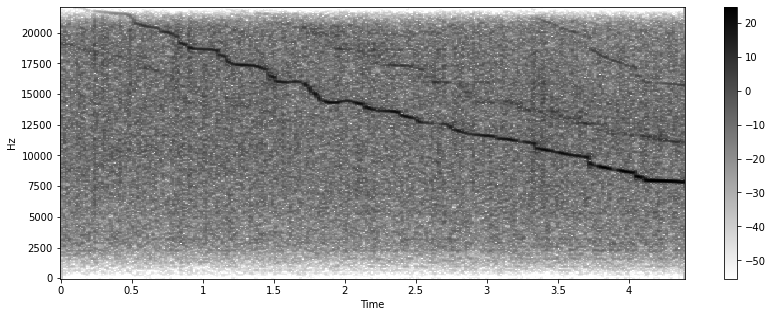

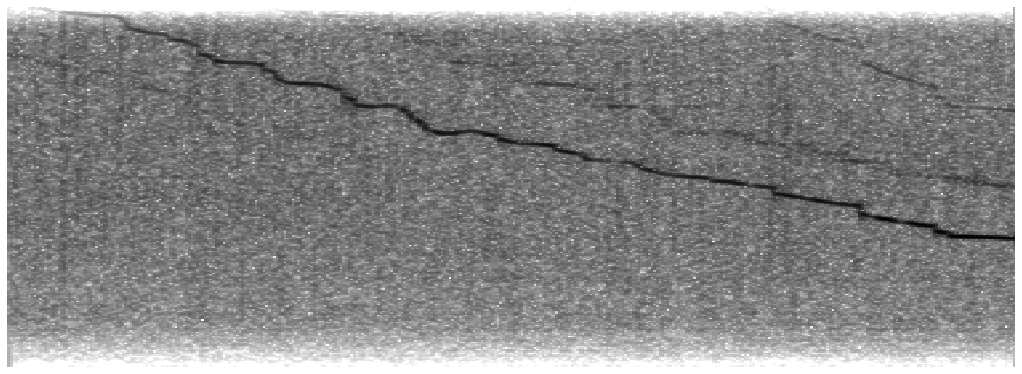

In [7]:
x, SAMPLE_RATE = librosa.load("./sample.wav", sr=44100)
FFT_NUM = 512

# show waveform of sample recording
librosa.display.waveshow(x, sr=SAMPLE_RATE)

X = librosa.stft(x, n_fft=FFT_NUM) # Apply fourier transform
Xdb = librosa.amplitude_to_db(abs(X), ref=np.median) # Convert amplitude spectrogram to dB-scaled spec
fig = plt.figure(figsize=(14, 5)) # Specify the size of the figure
# show spectrogram of sample recording
librosa.display.specshow(Xdb, cmap='gray_r', sr=SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.colorbar()

# Redraw without the axis and colourbar
fig = plt.figure(frameon=False)
fig.set_size_inches(14,5)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
librosa.display.specshow(Xdb, cmap='gray_r', sr=SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.imshow()

#Saving the file
fig.savefig("saved_spectrogram.png")

# SECTION2: Generating spectrograms from dataset

In [9]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pathlib import Path
import shutil

In [ ]:
CLIPS_PATH = Path("wav_clips")
SAVE_IMAGE_PATH = Path("model_test_train/train")

In [8]:
# Configure these as you wish, currently they are equal to the default values in  the function signature of save_spectrogram_image
SAMPLING_RATE = 48000 # gemma's improved sampling rate
FFT_NUM = 512 # fft number
DPI = 96 # dots per inch
MAX_FREQ = 22000
MIN_FREQ = 3000
IMAGE_SIZE = (413, 202)


def save_spectrogram_image(input_path, output_path, image_name, sampling_rate=48000, n_fft=512, dpi=96, max_freq=22000, min_freq=3000, img_size=(413, 202)):
  """
  This function takes in a file path, name of image, sampling rate, and fft number,
  it generates a spectrogram from a given sample recording and
  saves the spectrogram image 
  """
  f_step = sampling_rate / n_fft
  min_bin = int(min_freq / f_step)
  max_bin = int(max_freq / f_step)

  # Generate image
  x, sr = librosa.load(input_path, sr=sampling_rate)
  X = librosa.stft(x, n_fft = n_fft) # Apply fourier transform
  X = X[min_bin : max_bin, :] # Crop image vertically (frequency axis) from min_bin to max_bin
  Xdb = librosa.amplitude_to_db(abs(X)) # Convert amplitude spectrogram to dB-scaled spec
  fig = plt.figure(frameon=False, figsize=(img_size[0]/dpi, img_size[1]/dpi), dpi=dpi) # Reduce image
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  librosa.display.specshow(Xdb, cmap='gray_r', sr=sr, x_axis='time', y_axis='hz')

  # Save image
  fig.savefig(os.path.join(output_path, image_name + ".png"))
  plt.close(fig)

In [ ]:
# File system dependent code
def find_clips_local(root_path):
  #Assuming they're all directories
  for sub_dir_name in os.listdir(root_path):
    print("Starting  - " + sub_dir_name + " ------------")
    path_to_wavs = os.path.join(root_path, sub_dir_name)
    print("The path to waveforms is: " + path_to_wavs)
    for wavfile in os.listdir(path_to_wavs):
      if wavfile.endswith('.txt'): # Selection tables
        continue
      yield os.path.join(path_to_wavs, wavfile)
    print("Finished  -----------------------------------")

def find_clips_moby(root_path):
  for file_name in os.listdir(root_path):
    print("Starting  - " + file_name + " ------------")
    yield os.path.join(root_path, file_name)
  print("Finished  -----------------------------------")

def create_storage_for_images(directory_to_store_images):
  if os.path.exists(directory_to_store_images):
    shutil.rmtree(directory_to_store_images)
  os.makedirs(directory_to_store_images)

# Main code
create_storage_for_images(SAVE_IMAGE_PATH)
counter = 1
for clip_path in find_clips_local(CLIPS_PATH):
  save_spectrogram_image(clip_path, SAVE_IMAGE_PATH, str(counter))
  counter += 1
print("All images have been created")

## Resources and commands:

- `find ./train/bottlenose/ -maxdepth 1 -type f | head -n5 | xargs -d '\n' rm -f --`
- `find ./train/bottlenose/ -maxdepth 1 -type f | head -n5 | xargs cp -t ./test/bottlenose/`

- https://www.tensorflow.org/tutorials/images/cnn
- https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
- https://vijayabhaskar96.medium.com/-tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 